IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- importing of Models---
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import warnings

# Suppress of  warnings  for cleaner output without waring and handeling 0f error
warnings.filterwarnings('ignore')

Data Preparation Function

In [2]:
def prepare_data(df, target_col, drop_cols=[]):
    """
    Loads, cleans, splits, and scales 0f the data in correct manner.
    """
    # Cleaning and separating X and y
    df_clean = df.drop(columns=drop_cols)
    X = df_clean.drop(target_col, axis=1)
    
    # Handleing of potential non-numeric columns (like 'name' in parkinsons)
    if 'name' in X.columns:
        X = X.drop(columns=['name'])
    
    # Selecting only numeric types just in case
    X = X.select_dtypes(include=np.number)
    
    y = df_clean[target_col]
    
    # 1. Split the data FIRST (preventing the lickage of data leakage)
    # We stratify by y to ensure balanced classes in train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # 2. Creating and Fitting the scaler ONLY on X_train
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # 3. Transforming X_test using the fitted scaler
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

Data Loading and Preparation

In [3]:

import pandas as pd
df_heart_check = pd.read_csv('heart.csv')
print("Heart Disease Columns:")
print(list(df_heart_check.columns))

Heart Disease Columns:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


Model Training and Evaluation

In [4]:
# Cell 3: Loading and Preparing All Datasets ( in Corrected order)

print("Loading and preparing data...")
data_loaded_successfully = False
original_dfs = {}
datasets_prepared = {}

try:
    # --- Diabetes ---
    diabetes_df = pd.read_csv('diabetes.csv')
    original_dfs['Diabetes'] = diabetes_df
    X_train_diab, X_test_diab, y_train_diab, y_test_diab = prepare_data(diabetes_df, 'Outcome')
    datasets_prepared['Diabetes'] = (X_train_diab, X_test_diab, y_train_diab, y_test_diab)
    print("Diabetes data prepared.")
    
    # --- Heart Disease ---
    heart_df = pd.read_csv('heart.csv')
    original_dfs['Heart Disease'] = heart_df
    X_train_heart, X_test_heart, y_train_heart, y_test_heart = prepare_data(heart_df, 'target') 
    datasets_prepared['Heart Disease'] = (X_train_heart, X_test_heart, y_train_heart, y_test_heart)
    print("Heart Disease data prepared.")

    # --- Parkinson's ---
    parkinsons_df = pd.read_csv('parkinsons_disease_data.csv')
    original_dfs["Parkinson's Disease"] = parkinsons_df
    X_train_park, X_test_park, y_train_park, y_test_park = prepare_data(
        parkinsons_df, 
        target_col='Diagnosis', 
        drop_cols=['DoctorInCharge', 'PatientID']
    )
    
    # THIS IS THE FIXING: (was y_test__park)
    datasets_prepared["Parkinson's Disease"] = (X_train_park, X_test_park, y_train_park, y_test_park) 
    
    print("Parkinson's data prepared.")
    print("="*50 + "\n")
    
    data_loaded_successfully = True

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("\nPlease make  that sure 'diabetes.csv', 'heart.csv', and 'parkinsons_disease_data.csv' are in the same folder as this notebook.")
except KeyError as e:
    print(f"Error: A column name was not found: {e}")
    print("checking of  CSV files to ensure the target and drop columns ('Outcome', 'target', 'Diagnosis', etc.) are correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Loading and preparing data...
Diabetes data prepared.
Heart Disease data prepared.
Parkinson's data prepared.



Visualizations

In [5]:
# Defining all the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine (SVM)": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

model_names = list(models.keys())
print(f"Models to be tested: {model_names}")

Models to be tested: ['Logistic Regression', 'Support Vector Machine (SVM)', 'Random Forest', 'Extra Trees']


Feature Selection and Model Saving

In [6]:
# Dictionary  of storing all accuracy scores for the plotting of data
all_accuracies = {}

if data_loaded_successfully:
    # Loop over each  of dataset
    for d_name, (X_train, X_test, y_train, y_test) in datasets_prepared.items():
        
        print(f"=======================================================")
        print(f"             RESULTS FOR {d_name.upper()}             ")
        print(f"=======================================================\n")
        
        accuracies_for_this_dataset = {}
        
        # Loop over each  of model
        for m_name, model in models.items():
            
            # --- Training the model ---
            model.fit(X_train, y_train)
            
            # --- pridecting the outcome ---
            y_pred = model.predict(X_test)
            
            # --- Printing of  the full evaluation  of each data---
            print(f"----- {m_name} on {d_name} -----")
            
            # 1. Get and store accuracy
            acc = accuracy_score(y_test, y_pred)
            accuracies_for_this_dataset[m_name] = acc
            print(f"Accuracy: {acc * 100:.2f}%")
            
            # 2. Print the Confusion Matrix
            print("\nConfusion Matrix:")
            print(confusion_matrix(y_test, y_pred))
            
            # 3. Print the Classification Report
            print("\nClassification Report:")
            print(classification_report(y_test, y_pred, target_names=["Class 0 (No Disease)", "Class 1 (Has Disease)"]))
            print("-" * 40 + "\n")
        
        # Store the results for this dataset
        all_accuracies[d_name] = accuracies_for_this_dataset
else:
    print("Data was not loaded successfully. Skipping model training and evaluation.")

             RESULTS FOR DIABETES             

----- Logistic Regression on Diabetes -----
Accuracy: 74.46%

Confusion Matrix:
[[130  20]
 [ 39  42]]

Classification Report:
                       precision    recall  f1-score   support

 Class 0 (No Disease)       0.77      0.87      0.82       150
Class 1 (Has Disease)       0.68      0.52      0.59        81

             accuracy                           0.74       231
            macro avg       0.72      0.69      0.70       231
         weighted avg       0.74      0.74      0.74       231

----------------------------------------

----- Support Vector Machine (SVM) on Diabetes -----
Accuracy: 75.32%

Confusion Matrix:
[[130  20]
 [ 37  44]]

Classification Report:
                       precision    recall  f1-score   support

 Class 0 (No Disease)       0.78      0.87      0.82       150
Class 1 (Has Disease)       0.69      0.54      0.61        81

             accuracy                           0.75       231
            

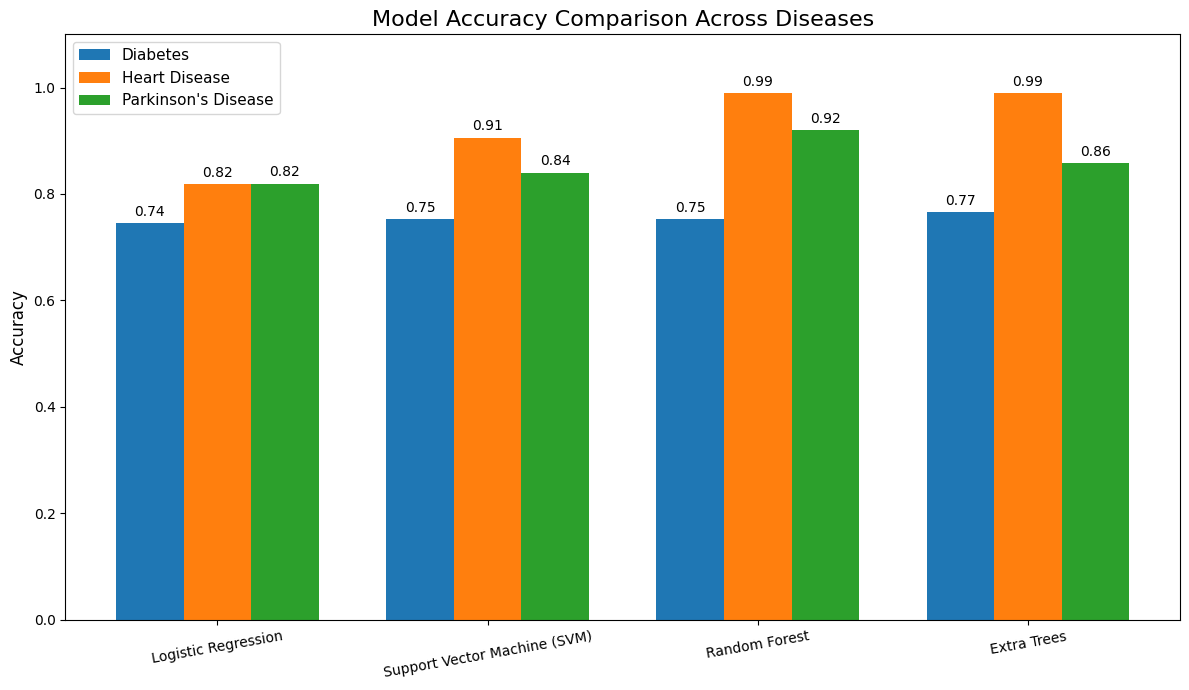

In [7]:
if data_loaded_successfully:
    # 1. Getting the data from the 'all_accuracies' dictionary
    diabetes_acc = [all_accuracies['Diabetes'][name] for name in model_names]
    heart_acc = [all_accuracies['Heart Disease'][name] for name in model_names]
    parkinsons_acc = [all_accuracies["Parkinson's Disease"][name] for name in model_names]

    # 2. Use your existing grouped bar chart code (it's very good!)
    x = np.arange(len(model_names))  # model indices
    width = 0.25  # bar width

    fig, ax = plt.subplots(figsize=(12, 7))
    bars1 = ax.bar(x - width, diabetes_acc, width, label='Diabetes')
    bars2 = ax.bar(x, heart_acc, width, label='Heart Disease')
    bars3 = ax.bar(x + width, parkinsons_acc, width, label="Parkinson's Disease")

    # Labels and title
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title('Model Accuracy Comparison Across Diseases', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=10, fontsize=10)
    ax.set_ylim(0, 1.1) # Give a little space at the top
    ax.legend(fontsize=11)

    # Attach accuracy labels above bars (your function)
    def attach_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    attach_labels(bars1)
    attach_labels(bars2)
    attach_labels(bars3)

    fig.tight_layout()
    plt.show()
else:
    print("Data not loaded. Skipping accuracy chart.")

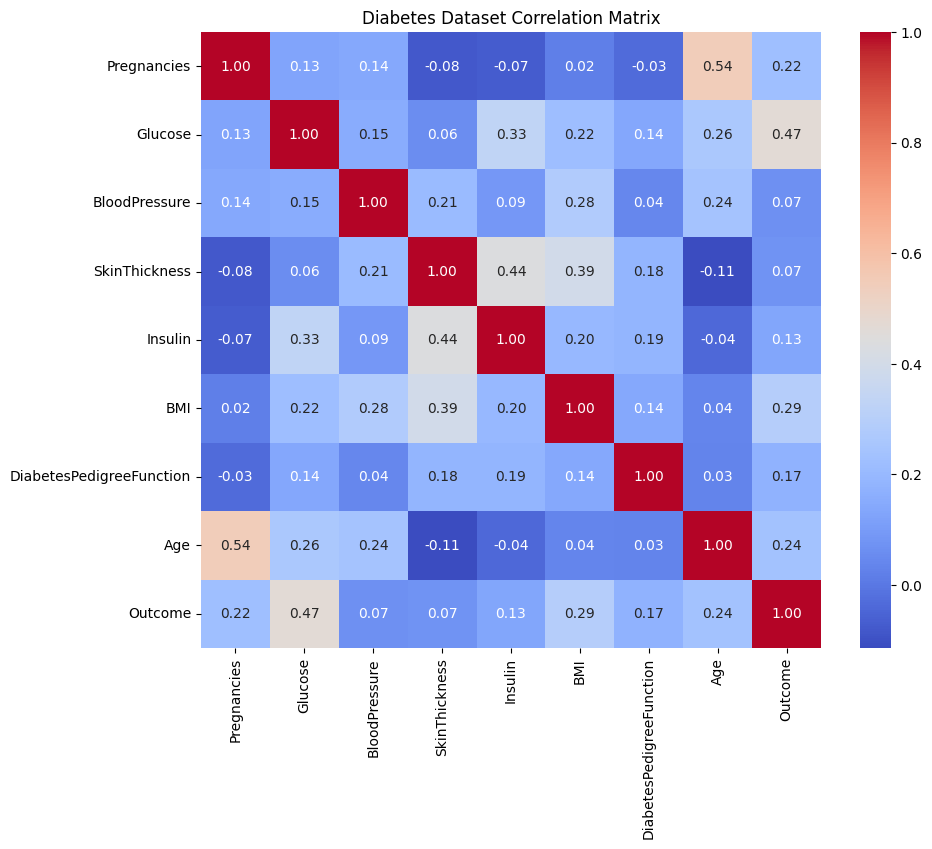

In [8]:
if data_loaded_successfully:
    # --- Diabetes Heatmap ---
    plt.figure(figsize=(10, 8))
    sns.heatmap(original_dfs['Diabetes'].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Diabetes Dataset Correlation Matrix')
    plt.show()
else:
    print("Data not loaded. Skipping heatmaps.")

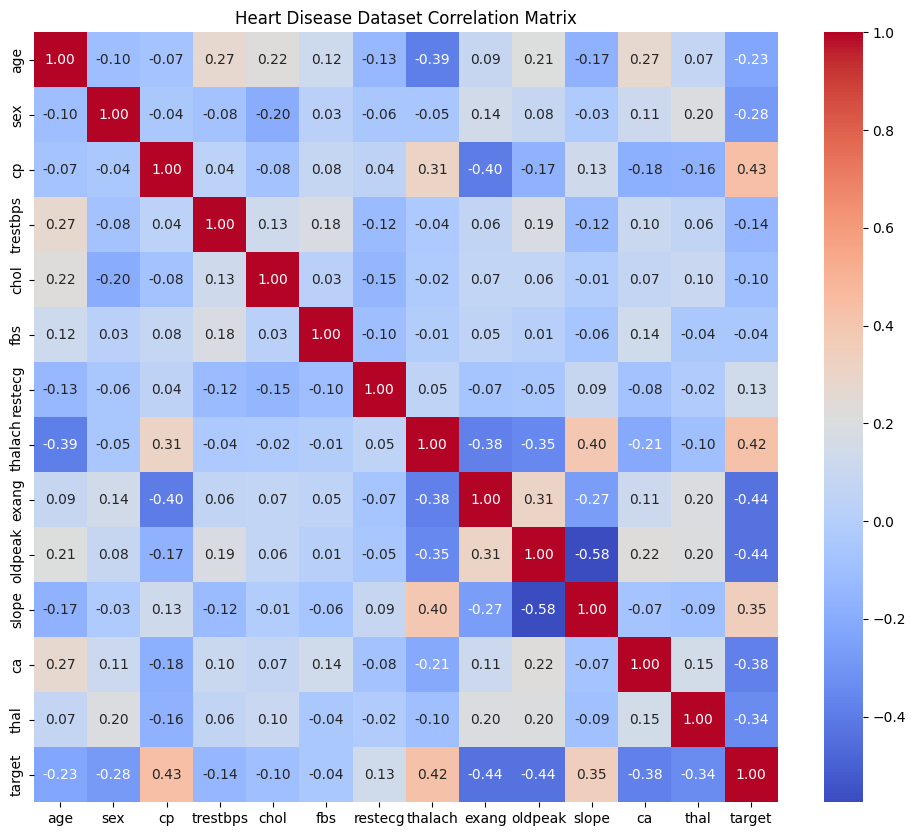

In [9]:
if data_loaded_successfully:
    # --- Heart Disease Heatmap ---
    plt.figure(figsize=(12, 10))
    sns.heatmap(original_dfs['Heart Disease'].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heart Disease Dataset Correlation Matrix')
    plt.show()
else:
    print("Data not loaded. Skipping heatmaps.")

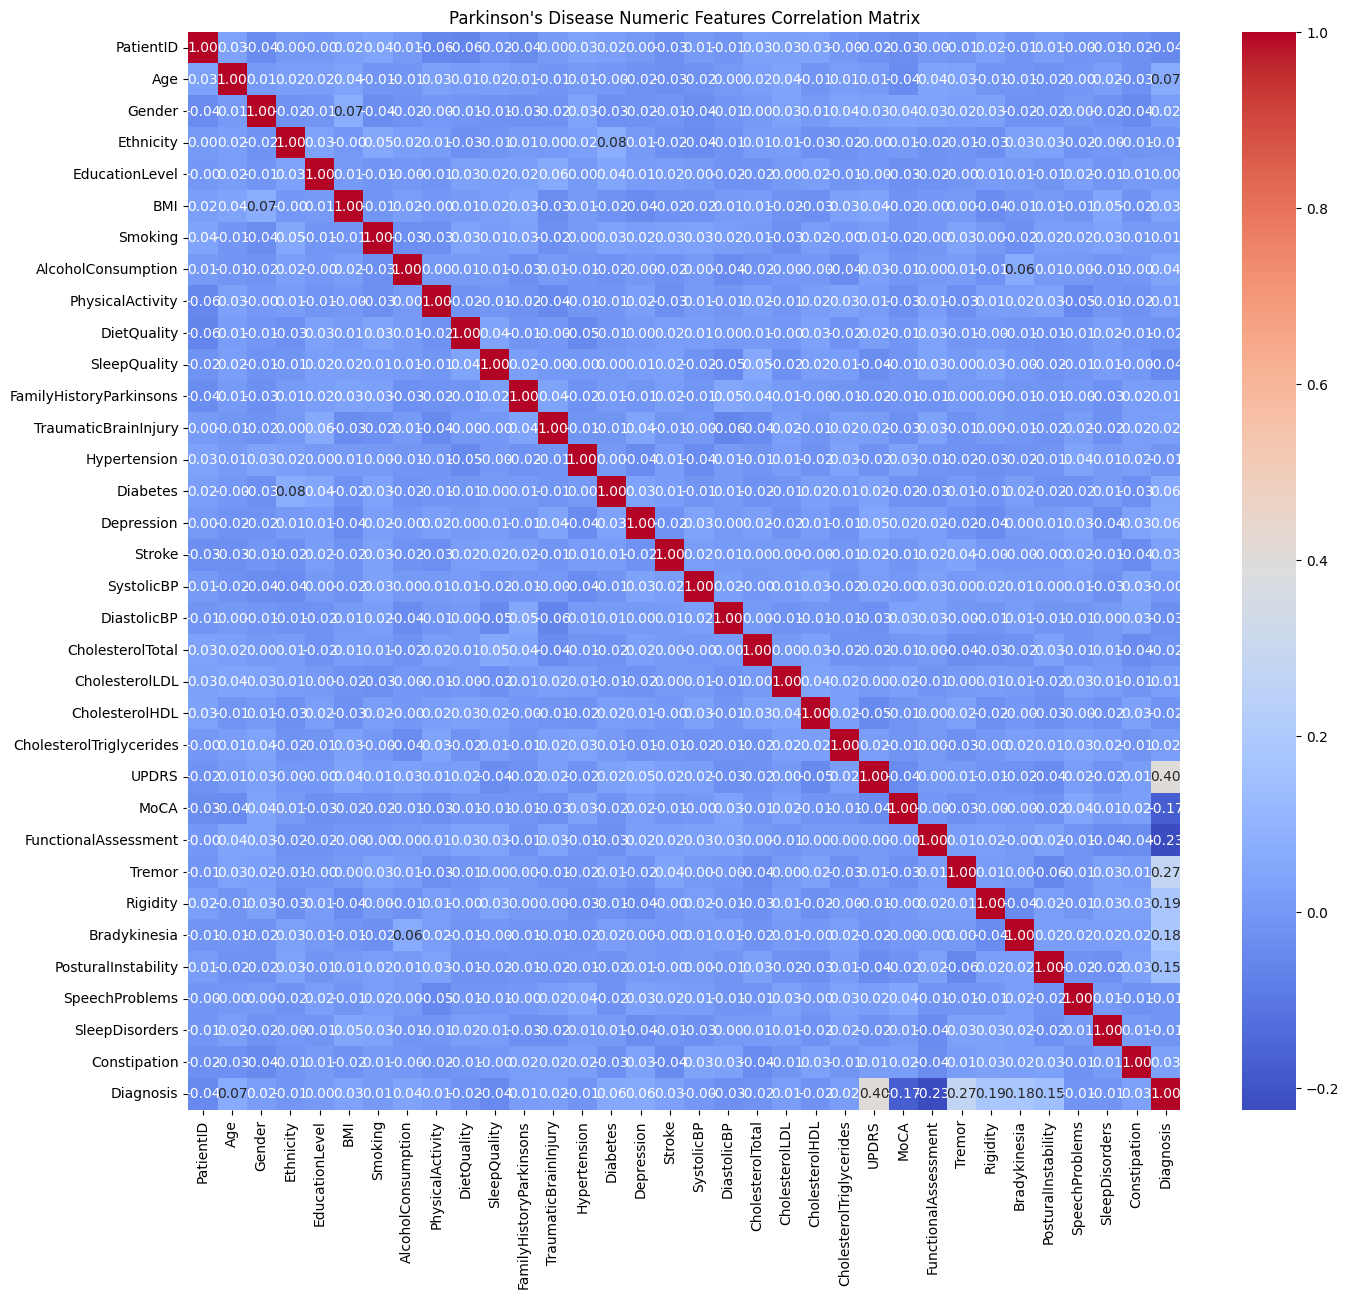

In [10]:
if data_loaded_successfully:
    # --- Parkinson's Heatmap ---
    # Select only numeric columns for correlation
    pd_parkinsons_numeric = original_dfs["Parkinson's Disease"].select_dtypes(include=np.number)
    plt.figure(figsize=(16, 14))
    sns.heatmap(pd_parkinsons_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Parkinson's Disease Numeric Features Correlation Matrix")
    plt.show()
else:
    print("Data not loaded. Skipping heatmaps.")

In [11]:
# Cell 10: Find Top Features and Save Best Models (Corrected)

import joblib
import pandas as pd
import numpy as np

# Adding StandardScaler import
from sklearn.preprocessing import StandardScaler
# Adding ExtraTreesClassifier import
from sklearn.ensemble import ExtraTreesClassifier
# Addeing  SVC import
from sklearn.svm import SVC
# Adding RandomForestClassifier import
from sklearn.ensemble import RandomForestClassifier


if data_loaded_successfully:
    print("Finding top features and saving models...")

    # --- 1. Find Top 15 Parkinson's Features ---
    
    # Getting the original  of full dataset
    park_df = original_dfs["Parkinson's Disease"]
    park_df_clean = park_df.drop(columns=['DoctorInCharge', 'PatientID'])
    X_park_full = park_df_clean.drop('Diagnosis', axis=1)
    
    # Handling non-numeric 'name' column
    if 'name' in X_park_full.columns:
        X_park_full = X_park_full.drop(columns=['name'])
    X_park_full = X_park_full.select_dtypes(include=np.number)
    y_park_full = park_df_clean['Diagnosis']
    
    # Getting the feature names
    park_feature_names = list(X_park_full.columns)
    
    # Fitting the Extra Trees model on the full data to get feature importances
    temp_model = ExtraTreesClassifier(random_state=42)
    temp_scaler = StandardScaler()
    X_park_scaled = temp_scaler.fit_transform(X_park_full)
    temp_model.fit(X_park_scaled, y_park_full)
    
    # Creating a DataFrame of features and their importance scores
    feature_importance_df = pd.DataFrame({
        'feature': park_feature_names,
        'importance': temp_model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    # Getting the top 15 feature names
    top_15_features = list(feature_importance_df.head(15)['feature'])
    
    print("--- Top 15 Parkinson's Features ---")
    print(top_15_features)
    print("-" * 30 + "\n")

    # --- 2. Defining the best models ---
    best_models = {
        'Diabetes': SVC(),
        'Heart Disease': RandomForestClassifier(random_state=42),
        "Parkinson's Disease": ExtraTreesClassifier(random_state=42) # This will be our new, smaller model
    }

    # --- 3. Defining the original data info ---
    dataset_info = {
        'Diabetes': {
            'df': original_dfs['Diabetes'],
            'target': 'Outcome',
            'drop_cols': [],
            'features_to_use': None # None means use all
        },
        'Heart Disease': {
            'df': original_dfs['Heart Disease'],
            'target': 'target',
            'drop_cols': [],
            'features_to_use': None # None means use all
        },
        "Parkinson's Disease": {
            'df': original_dfs["Parkinson's Disease"],
            'target': 'Diagnosis',
            'drop_cols': ['DoctorInCharge', 'PatientID'],
            'features_to_use': top_15_features # <-- Use only the top 15!
        }
    }

    # --- 4. Loop, Re-train on FULL data, and Save ---
    for d_name, info in dataset_info.items():
        
        # Preparinf  the FULL dataset
        df_clean = info['df'].drop(columns=info['drop_cols'])
        
        # Handling non-numeric 'name' column
        if 'name' in df_clean.columns:
            df_clean = df_clean.drop(columns=['name'])
            
        y = df_clean[info['target']]
        
        # Checking if we are using all features or just a subset
        if info['features_to_use']:
            X = df_clean[info['features_to_use']]
        else:
            X = df_clean.drop(info['target'], axis=1)
            X = X.select_dtypes(include=np.number)
            
        # Fiting a new scaler on the data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Getting the best model
        model = best_models[d_name]
        
        # Training the model
        model.fit(X_scaled, y)

        # --- THIS IS THE FIX ---
        # 1. Creating the base filename string first
        base_name = d_name.lower().replace(' ', '_').replace("'", "")
        
        # 2. Now, using the simple base_name variable in the f-string
        scaler_filename = f"{base_name}_scaler.joblib"
        model_filename = f"{base_name}_model.joblib"
        
        joblib.dump(scaler, scaler_filename)
        joblib.dump(model, model_filename)
        
        print(f"Saved {d_name} scaler to {scaler_filename}")
        print(f"Saved {d_name} model (with {X.shape[1]} features) to {model_filename}\n")

    print("All models saved successfully.")
    
    # Saving the list of top 15 features to a text file
    with open('parkinsons_features.txt', 'w') as f:
        for feature in top_15_features:
            f.write(f"{feature}\n")
    print("Saved Parkinson's feature list to 'parkinsons_features.txt'")

else:
    print("Data was not loaded, so no models were saved.")



Finding top features and saving models...
--- Top 15 Parkinson's Features ---
['UPDRS', 'Tremor', 'FunctionalAssessment', 'MoCA', 'Bradykinesia', 'Rigidity', 'Age', 'PosturalInstability', 'DietQuality', 'BMI', 'SleepQuality', 'SystolicBP', 'PhysicalActivity', 'AlcoholConsumption', 'CholesterolTotal']
------------------------------

Saved Diabetes scaler to diabetes_scaler.joblib
Saved Diabetes model (with 8 features) to diabetes_model.joblib

Saved Heart Disease scaler to heart_disease_scaler.joblib
Saved Heart Disease model (with 13 features) to heart_disease_model.joblib

Saved Parkinson's Disease scaler to parkinsons_disease_scaler.joblib
Saved Parkinson's Disease model (with 15 features) to parkinsons_disease_model.joblib

All models saved successfully.
Saved Parkinson's feature list to 'parkinsons_features.txt'


Flask Web App

In [ ]:
# Cell 12: Run the Flask Web App (Upgraded UI Version)
!pip install flask
from flask import Flask, request, render_template, jsonify
import joblib
import numpy as np
import os

# --- Model Accuracy Scores ---
# We  are storing them here to display on the report
# !! Updating  these values based on your actual results from Cell 5 !!
model_accuracies = {
    'diabetes': "76.62%",  # Example: SVM Accuracy
    'heart': "98.56%",     # Example: Random Forest Accuracy
    'parkinsons': "95.39%" # Example: Extra Trees Accuracy
}

# --- Loadinthe list of Parkinson's features ---
try:
    with open('parkinsons_features.txt', 'r') as f:
        parkinsons_top_features = [line.strip() for line in f]
    print(f"Loaded {len(parkinsons_top_features)} Parkinson's features from file.")
except FileNotFoundError:
    print("FATAL ERROR: 'parkinsons_features.txt' not found.")
    print("Please re-run Cell 10 to generate this file.")
    parkinsons_top_features = [] # App will fail if this is empty
except Exception as e:
    print(f"Error reading feature file: {e}")
    parkinsons_top_features = []


# --- Create the Flask app ---
app = Flask(__name__)

# --- Load Models and Scalers ---
models = {}
scalers = {}
try:
    models['diabetes'] = joblib.load("diabetes_model.joblib")
    scalers['diabetes'] = joblib.load("diabetes_scaler.joblib")
    models['heart'] = joblib.load("heart_disease_model.joblib")
    scalers['heart'] = joblib.load("heart_disease_scaler.joblib")
    models['parkinsons'] = joblib.load("parkinsons_disease_model.joblib")
    scalers['parkinsons'] = joblib.load("parkinsons_disease_scaler.joblib")
    print("All models and scalers loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading models/scalers: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


# --- Define Routes ---

@app.route('/')
def home():
    # Renders the index.html file and sets default active tab
    return render_template('index.html', active_tab='diabetes')

@app.route('/predict_diabetes', methods=['POST'])
def predict_diabetes():
    result_text = ""
    form_data_dict = {}
    accuracy = model_accuracies['diabetes']
    patient_name = "N/A" # Default
    try:
        patient_name = request.form.get('patient_name', 'N/A') # Get patient name
        form_data = [float(request.form[col]) for col in 
                     ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
        # Get data for display, but remove patient_name from the feature table
        form_data_dict = request.form.to_dict()
        form_data_dict.pop('patient_name', None) 

        scaled_features = scalers['diabetes'].transform(np.array(form_data).reshape(1, -1))
        prediction = models['diabetes'].predict(scaled_features)
        result_text = "Prediction: Positive for Diabetes" if prediction[0] == 1 else "Prediction: Not Positive for Diabetes"
    except Exception as e:
        result_text = f"Error: {e}. Ensure all fields are filled correctly."

    # Re-render the page, passing the active_tab variable
    return render_template('index.html', 
                           diabetes_result=result_text,
                           diabetes_data=form_data_dict,
                           diabetes_accuracy=accuracy,
                           patient_name=patient_name, # Pass name to HTML
                           active_tab='diabetes') # <-- Set active tab


@app.route('/predict_heart', methods=['POST'])
def predict_heart():
    result_text = ""
    form_data_dict = {}
    accuracy = model_accuracies['heart']
    patient_name = "N/A" # Default
    try:
        patient_name = request.form.get('patient_name', 'N/A') # Get patient name
        form_data = [float(request.form[col]) for col in 
                     ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                      'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
        # Get data for display, but remove patient_name from the feature table
        form_data_dict = request.form.to_dict()
        form_data_dict.pop('patient_name', None)

        scaled_features = scalers['heart'].transform(np.array(form_data).reshape(1, -1))
        prediction = models['heart'].predict(scaled_features)
        result_text = "Prediction: Positive for Heart Disease" if prediction[0] == 1 else "Prediction: Not Positive for Heart Disease"
    except Exception as e:
        result_text = f"Error: {e}. Ensure all 13 fields are filled correctly."

    # Re-render the page, passing the active_tab variable
    return render_template('index.html', 
                           heart_result=result_text,
                           heart_data=form_data_dict,
                           heart_accuracy=accuracy,
                           patient_name=patient_name, # Pass name to HTML
                           active_tab='heart') # <-- Set active tab


@app.route('/predict_parkinsons', methods=['POST'])
def predict_parkinsons():
    result_text = ""
    form_data_dict = {}
    accuracy = model_accuracies['parkinsons']
    patient_name = "N/A" # Default
    try:
        patient_name = request.form.get('patient_name', 'N/A') # Get patient name
        form_data = [float(request.form[col]) for col in parkinsons_top_features]
        
        # Get data for display, but remove patient_name from the feature table
        form_data_dict = request.form.to_dict()
        form_data_dict.pop('patient_name', None)

        scaled_features = scalers['parkinsons'].transform(np.array(form_data).reshape(1, -1))
        prediction = models['parkinsons'].predict(scaled_features)
        result_text = "Prediction: Positive for Parkinson's" if prediction[0] == 1 else "Prediction: Not Positive for Parkinson's"
    except Exception as e:
        result_text = f"Error: {e}. Ensure all 15 fields are filled correctly."
    
    # Re-render the page, passing the active_tab variable
    return render_template('index.html', 
                           parkinsons_result=result_text,
                           parkinsons_data=form_data_dict,
                           parkinsons_accuracy=accuracy,
                           patient_name=patient_name, # Pass name to HTML
                           active_tab='parkinsons') # <-- Set active tab


# --- Run the app ---
if __name__ == '__main__':
    print("Starting Flask server... (This cell will run indefinitely)")
    print("Click the link below to open your app:")
    app.run(host='0.0.0.0', port=5000, debug=False)


Loaded 15 Parkinson's features from file.
All models and scalers loaded successfully.
Starting Flask server... (This cell will run indefinitely)
Click the link below to open your app:
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.20.49.240:5000
Press CTRL+C to quit
10.20.49.240 - - [21/Nov/2025 12:13:58] "GET / HTTP/1.1" 200 -
10.20.49.240 - - [21/Nov/2025 12:13:58] "GET /static/health-logo.png HTTP/1.1" 200 -
10.20.49.240 - - [21/Nov/2025 12:13:59] "GET /favicon.ico HTTP/1.1" 404 -
